In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers, regularizers

In [2]:
!git clone https://github.com/luisdiaz1997/DataScienceCourse

Cloning into 'DataScienceCourse'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 1435 (delta 0), reused 0 (delta 0), pack-reused 1432
Receiving objects: 100% (1435/1435), 663.91 MiB | 15.33 MiB/s, done.
Resolving deltas: 100% (54/54), done.
Checking out files: 100% (1396/1396), done.


In [3]:
cd DataScienceCourse

/content/DataScienceCourse


In [0]:
files = glob.glob('datasets/*monkey*/**/*jpg', recursive = True)

In [5]:
files[0].split('/')[3:]

['validation', 'n4', 'n409.jpg']

In [0]:
df = pd.DataFrame(data = np.array([file.split('/')[3:-1] for file in files], dtype = str), columns = ['train_type', 'label'])
df['path'] = files
df['label'] = pd.Categorical(df.label)

In [7]:
df.head()

,train_type,label,path
0,validation,n4,datasets/10-monkey-species/validation/validati...
1,validation,n4,datasets/10-monkey-species/validation/validati...
2,validation,n4,datasets/10-monkey-species/validation/validati...
3,validation,n4,datasets/10-monkey-species/validation/validati...
4,validation,n4,datasets/10-monkey-species/validation/validati...


In [0]:
category = pd.get_dummies(df.label, prefix = 'category')

In [9]:
category.head()

,category_n0,category_n1,category_n2,category_n3,category_n4,category_n5,category_n6,category_n7,category_n8,category_n9
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


In [0]:
ims = np.array([np.array(image.load_img(file,target_size=(128, 128))) for file in files])

In [11]:
ims.shape

(1369, 128, 128, 3)

In [0]:
training = df.train_type == 'training'

In [0]:
x_train, y_train = ims[training], category[training]
x_test, y_test = ims[~training], category[~training]

In [14]:
x_train.shape

(1097, 128, 128, 3)

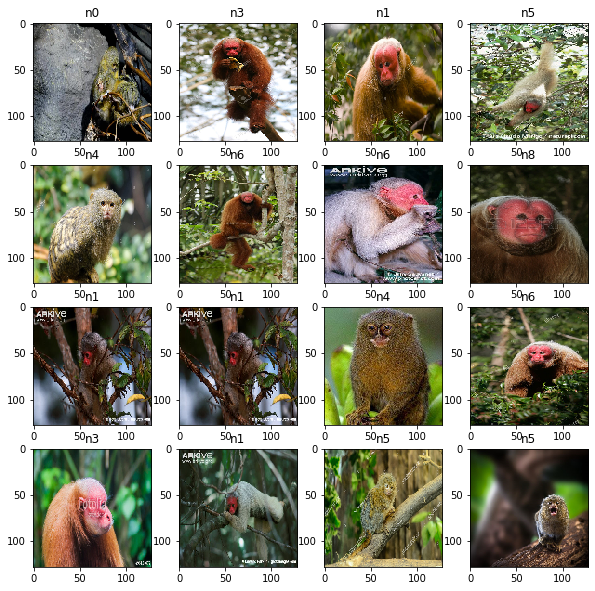

In [15]:
plt.figure(figsize = (10, 10))
l = np.random.randint(low = 200, size =(16)) 
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[l[i]])
    plt.title(df.label[l[i]])

In [0]:
datagen = image.ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [0]:
datagen.fit(x_train)

In [0]:
def create_model(x):
    reg = 1e-4
    model = models.Sequential()
    model.add(layers.Conv2D(32, input_shape = x.shape[1:], kernel_size = (3, 3), strides = (1, 1), padding = 'same',  kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.MaxPool2D( pool_size = (2, 2), padding = 'valid'))
    model.add(layers.Conv2D(16, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(reg)))
    model.add(layers.Conv2D(16, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(reg)))
    model.add(layers.Conv2D(16, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(reg)))
    model.add(layers.Conv2D(16, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(reg)))

    model.add(layers.MaxPool2D( pool_size = (2, 2), padding = 'valid'))
    model.add(layers.Conv2D(64, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(reg)))
    model.add(layers.MaxPool2D( pool_size = (2, 2), padding = 'valid'))
    model.add(layers.Conv2D(16, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(reg)))
    model.add(layers.Conv2D(16, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(reg)))
    model.add(layers.Conv2D(16, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(reg)))
    model.add(layers.Conv2D(8, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(reg)))
    model.add(layers.MaxPool2D( pool_size = (2, 2), padding = 'valid'))
    
    model.add(layers.Flatten())
    #model.add(layers.Dense(64, activation ='relu',kernel_regularizer=regularizers.l2(0.1)))
    model.add(layers.Dense(10, activation ='softmax'))
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model
    

In [0]:
model = create_model(x_train)

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 16)        4624      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 16)        2320      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 16)        2320      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 16)        2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 16)       

In [0]:
batch_size = 100

In [0]:
#model.fit(x_train, y_train, batch_size = batch_size, epochs = 10)

In [43]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) / batch_size, epochs=10)
                    

Epoch 1/10
11/10 [==============================] - 4s 350ms/step - loss: 0.4659 - acc: 0.8523
Epoch 2/10
11/10 [==============================] - 4s 351ms/step - loss: 0.5069 - acc: 0.8368
Epoch 3/10
11/10 [==============================] - 4s 346ms/step - loss: 0.5215 - acc: 0.8295
Epoch 4/10
11/10 [==============================] - 4s 348ms/step - loss: 0.4854 - acc: 0.8432
Epoch 5/10
11/10 [==============================] - 4s 346ms/step - loss: 0.4588 - acc: 0.8551
Epoch 6/10
11/10 [==============================] - 4s 342ms/step - loss: 0.4877 - acc: 0.8405
Epoch 7/10
11/10 [==============================] - 4s 356ms/step - loss: 0.4496 - acc: 0.8541
Epoch 8/10
11/10 [==============================] - 4s 350ms/step - loss: 0.4961 - acc: 0.8368
Epoch 9/10
11/10 [==============================] - 4s 336ms/step - loss: 0.4656 - acc: 0.8405
Epoch 10/10
11/10 [==============================] - 4s 340ms/step - loss: 0.4519 - acc: 0.8514


In [44]:
model.evaluate(x_train, y_train)
model.evaluate(x_test, y_test)

272/272 [==============================] - 0s 291us/sample - loss: 0.8537 - acc: 0.7684


[0.8536986919010386, 0.7683824]

In [46]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [48]:
ls

convnets.ipynb  LogisticRegression.ipynb  Neuralnet.ipynb  TFintro.py
datasets/       model.h5                  README.md
linearnp.ipynb  model.json                TFintro.ipynb


In [0]:
git 